In [460]:
import pandas as pd
import seaborn as sns

In [461]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [462]:
df = pd.read_csv(r'D:\Pgm\DataScience\Dataset\Medical-Cost-Prediction\insurance.csv')

In [463]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [603]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [604]:
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
86,57,female,31.16,0,yes,northwest,43578.93940
259,19,male,31.92,0,yes,northwest,33750.29180
269,49,male,25.84,1,no,northeast,9282.48060
878,41,male,28.80,1,no,southwest,6282.23500
260,58,female,25.20,0,no,southwest,11837.16000
219,24,female,23.21,0,no,southeast,25081.76784
530,57,male,42.13,1,yes,southeast,48675.51770
539,53,male,31.35,0,no,southeast,27346.04207
227,58,female,41.91,0,no,southeast,24227.33724
737,26,male,23.70,2,no,southwest,3484.33100


In [465]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [466]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [467]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [468]:
# no null values in our dataset

In [469]:
df.duplicated().sum()

1

In [470]:
df[df.duplicated()==True]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [471]:
df=df.drop_duplicates()

In [472]:
df.shape

(1337, 7)

In [473]:
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
201,48,female,32.230,1,no,southeast,8871.15170
1249,32,male,33.630,1,yes,northeast,37607.52770
1146,60,male,32.800,0,yes,southwest,52590.82939
163,32,female,29.800,2,no,southwest,5152.13400
642,61,male,33.915,0,no,northeast,13143.86485
188,41,female,32.200,1,no,southwest,6775.96100
422,40,male,32.775,1,yes,northeast,39125.33225
303,28,female,33.000,2,no,southeast,4349.46200
1153,35,female,35.815,1,no,northwest,5630.45785
130,59,female,26.505,0,no,northeast,12815.44495


In [474]:
#EDA

<Axes: xlabel='age', ylabel='Count'>

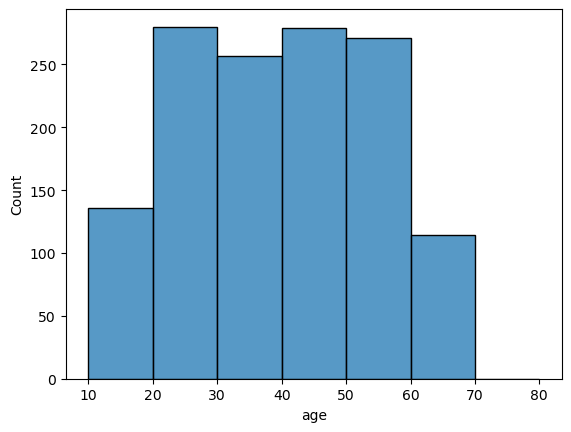

In [475]:
sns.histplot(df['age'],bins =[10,20,30,40,50,60,70,80])

In [476]:
# so most of people ranges between 20 to 60

In [477]:
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

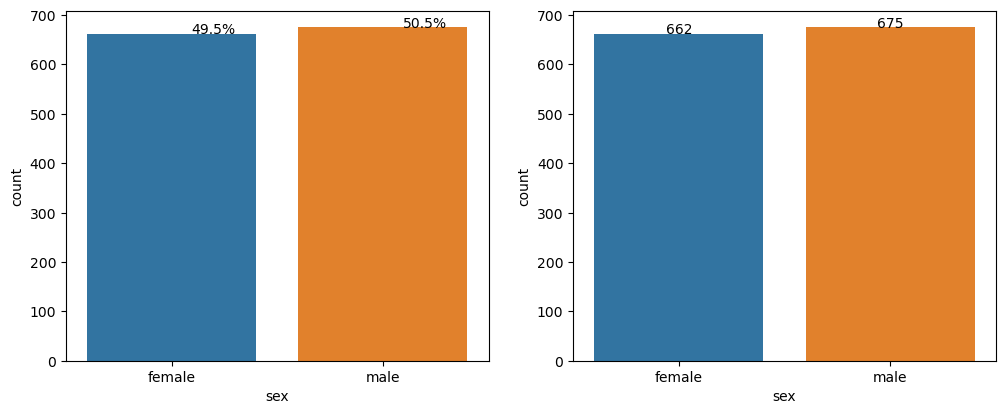

In [478]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
ax = sns.countplot(data=df, x='sex')
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x= p.get_x() + p.get_width()-0.2
    y= p.get_height()
    ax.annotate(percentage, (x,y),ha='center')
    
    
plt.subplot(2,2,2)
ax = sns.countplot(data=df, x='sex')
for p in ax.patches:
    values = int(p.get_height())
    x= p.get_x() + p.get_width()-0.4
    y= p.get_height()
    ax.annotate(values, (x,y),ha='center')
plt.show()

In [479]:
# so both male and female in same proportion

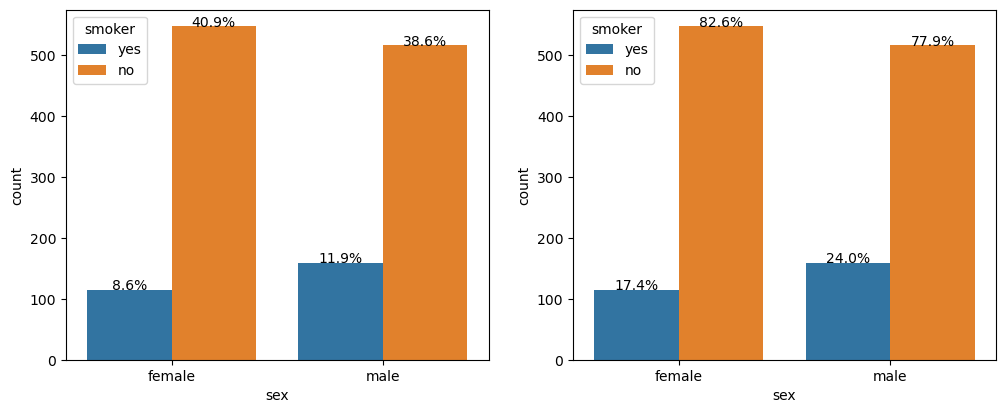

In [480]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)

ax=sns.countplot(data=df, x='sex', hue='smoker')
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x= p.get_x() + p.get_width()-0.2
    y= p.get_height()
    ax.annotate(percentage, (x,y),ha='center')
    
plt.subplot(2,2,2)

ax=sns.countplot(data=df, x='sex', hue='smoker')
total = float(len(df[df['sex'] == df['sex'].unique()[0]]))

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x= p.get_x() + p.get_width()-0.2
    y= p.get_height()
    ax.annotate(percentage, (x,y),ha='center')

plt.show()

In [481]:
# BMI

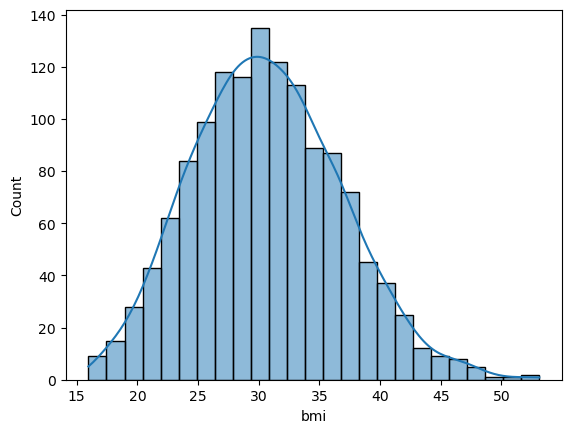

In [482]:
sns.histplot(df['bmi'],kde=True)
plt.show()

In [483]:
# BMI is normally distributed

<Axes: xlabel='bmi', ylabel='charges'>

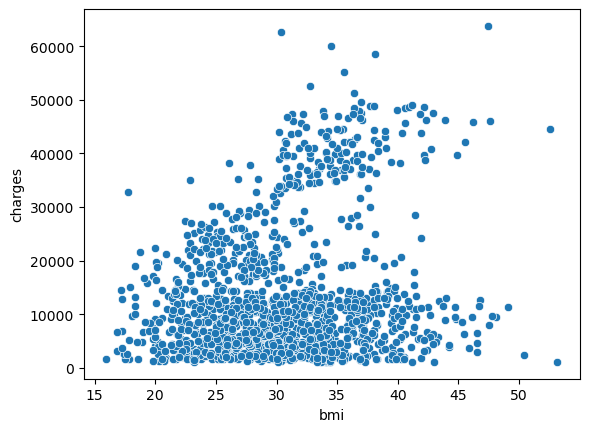

In [484]:
sns.scatterplot(data=df, x='bmi',y='charges')

<Axes: xlabel='bmi', ylabel='charges'>

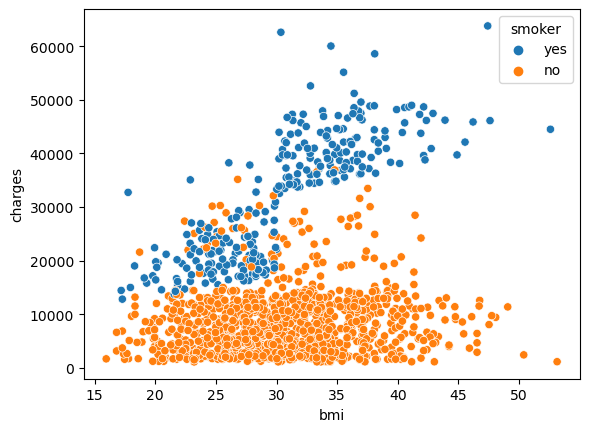

In [485]:
sns.scatterplot(data=df, x='bmi',y='charges',hue='smoker')

In [486]:
# so charges for smoker are clearly seen as high having bmi over 25-30 and has somewhat linear relation

<Axes: xlabel='age', ylabel='charges'>

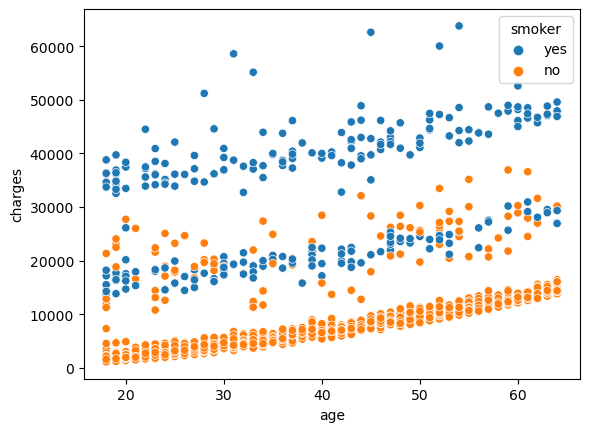

In [487]:
sns.scatterplot(data=df, x='age',y='charges',hue='smoker')

In [488]:
# with age charges increasing slightly in linear fashion but can been seen in seprate for smoker and non smoker

In [489]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

<Axes: xlabel='children', ylabel='count'>

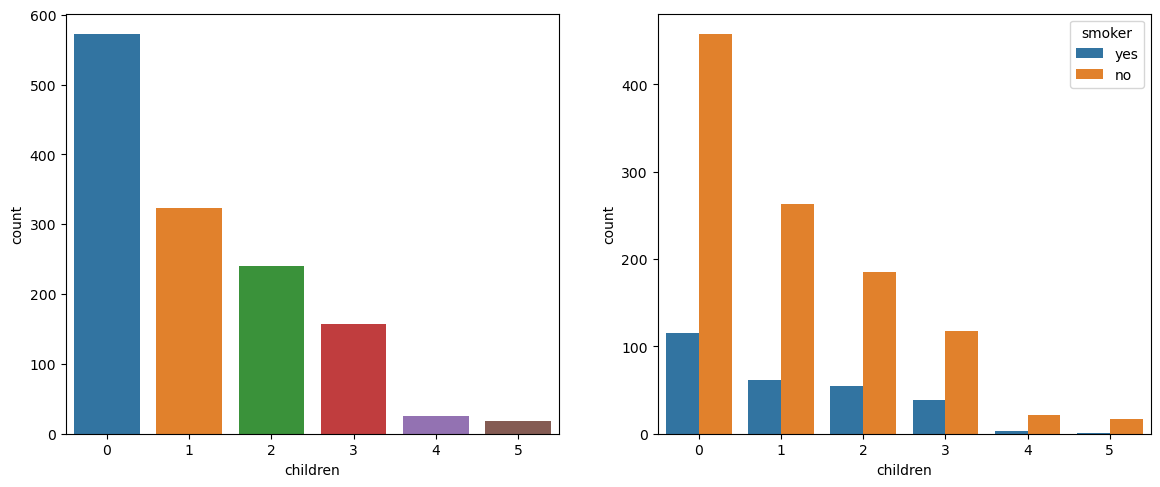

In [490]:
plt.figure(figsize=(14,12))
plt.subplot(2,2,1)
sns.countplot(data=df,x='children')
plt.subplot(2,2,2)
sns.countplot(data=df,x='children',hue='smoker')

In [491]:
# so most of people don't have children and decreasing as no of children increase
# smoking is prominent for those having no children than those having and decresing trend as no of children increase

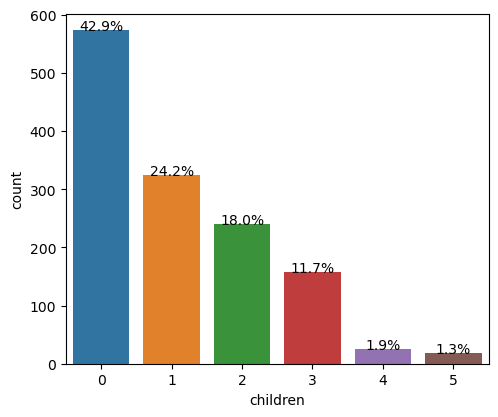

In [492]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)

ax=sns.countplot(data=df, x='children')
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x= p.get_x() + p.get_width()-0.4
    y= p.get_height()
    ax.annotate(percentage, (x,y),ha='center')


In [493]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

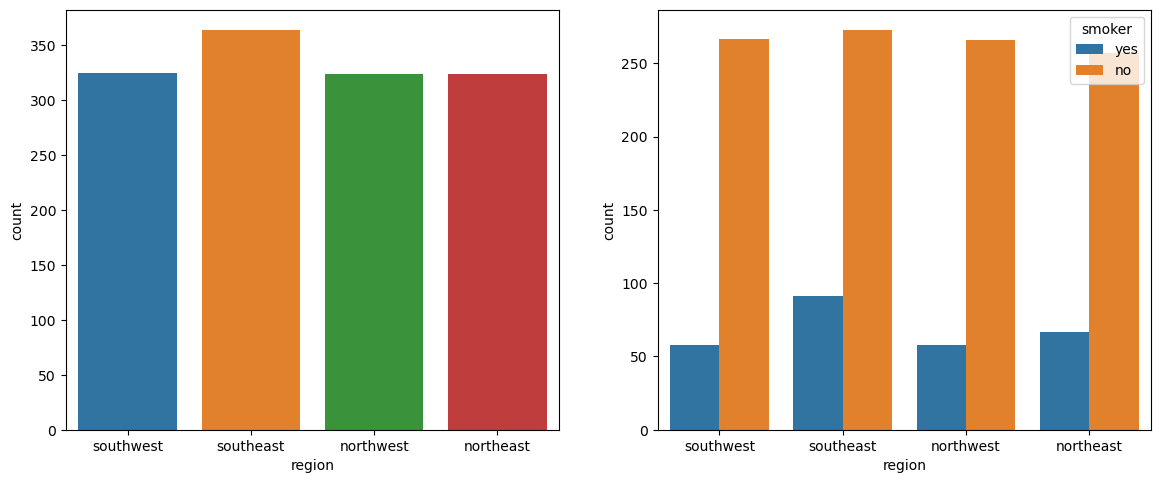

In [494]:
plt.figure(figsize=(14,12))
plt.subplot(2,2,1)
sns.countplot(data=df,x='region')
plt.subplot(2,2,2)

sns.countplot(data=df,x='region',hue='smoker')

plt.show()

<Axes: xlabel='region', ylabel='count'>

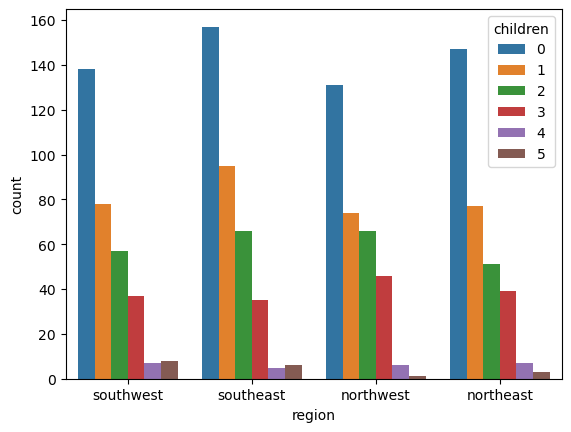

In [495]:
sns.countplot(data=df,x='region',hue='children')

In [496]:
# data manipulation

In [497]:
df1 =df.copy()

In [498]:
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [499]:
def fun(x):
    if x<18.5:
        return 'Underweight'
    elif x>= 18.5 and x<=24.9:
        return 'Healthy Weight'
    elif x>=25  and x<=29.9:
        return "Overweight"
    elif x>30:
        return "Obesity"

In [500]:
df1['BMI_category']=df1['bmi'].apply(fun)

In [501]:
df1

,age,sex,bmi,children,smoker,region,charges,BMI_category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obesity
2,28,male,33.000,3,no,southeast,4449.46200,Obesity
3,33,male,22.705,0,no,northwest,21984.47061,Healthy Weight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obesity
1334,18,female,31.920,0,no,northeast,2205.98080,Obesity
1335,18,female,36.850,0,no,southeast,1629.83350,Obesity
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight


In [502]:
df1['BMI_category'].unique()

array(['Overweight', 'Obesity', 'Healthy Weight', 'Underweight', None],
      dtype=object)

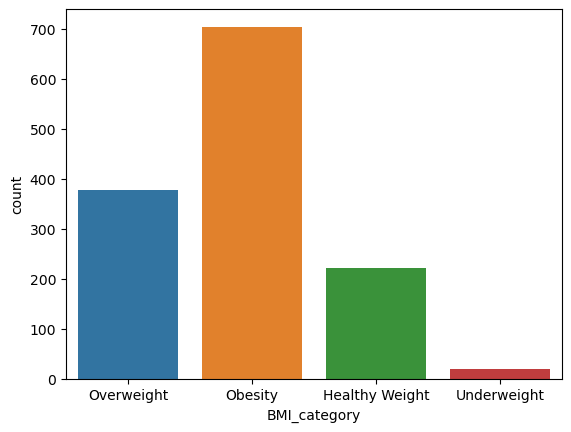

In [503]:
sns.countplot(x=df1['BMI_category'])
plt.show()

In [504]:
df1.groupby('BMI_category').size()

BMI_category
Healthy Weight    222
Obesity           704
Overweight        377
Underweight        20
dtype: int64

In [505]:
labels=df1.groupby('BMI_category').size().index

In [506]:
labels

Index(['Healthy Weight', 'Obesity', 'Overweight', 'Underweight'], dtype='object', name='BMI_category')

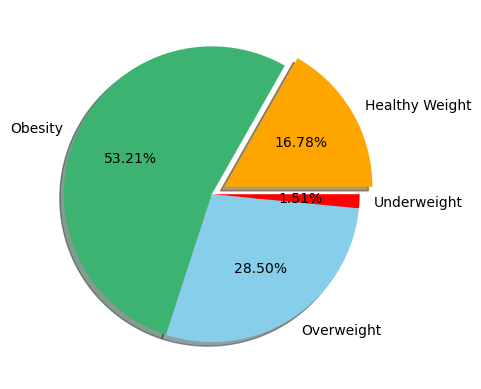

In [507]:
plt.pie(df1.groupby('BMI_category').size(),autopct='%.2f%%',colors=['orange','mediumseagreen','skyblue','red'],
        labels=labels,explode=[0.1,0,0,0] ,shadow=True)
plt.show()

In [508]:
# most of people have weight status as Obesity about(53%)half
# healthy person are only 16%
#overweight are 28.5%
# and only 1.5% are underweight

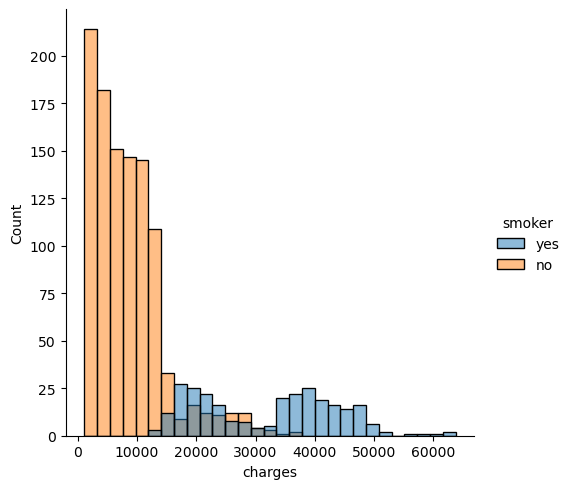

In [509]:
sns.displot(data=df1,x='charges',hue='smoker')
plt.show()

In [510]:
# smoker are paying high charges while those don smoke have low charges so smoking is important parameter

In [511]:
df_region_smoker=df1.groupby(['region','smoker']).size()

In [512]:
regions=df['region'].unique()

In [513]:
df_region_smoker['northeast']

smoker
no     257
yes     67
dtype: int64

In [514]:
labels=df_region_smoker['northeast'].index

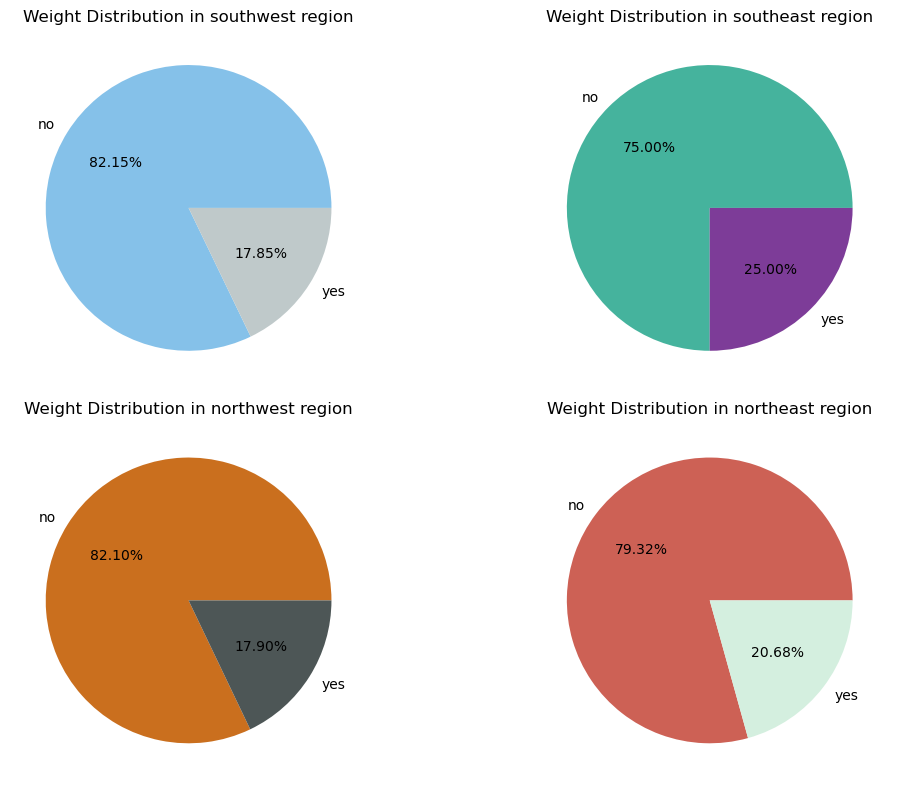

In [515]:
colors = [['#85c1e9', '#bfc9ca'], ['#45b39d', '#7d3c98'], ['#ca6f1e', '#4d5656'], ['#cd6155', '#d4efdf']]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, j in enumerate(axes.flat):
    labels = df_region_smoker[regions[i]].index
    j.pie(df_region_smoker[regions[i]], autopct='%.2f%%', colors=colors[i], labels=labels)
    j.set_title(f'Weight Distribution in {regions[i]} region')

plt.tight_layout()
plt.show()

In [516]:
# so southeast region has high smoker than other about 25% of its region followed by northeast
# while southwest and northwest are almost carry same percentage near to 18%

<Axes: xlabel='region', ylabel='charges'>

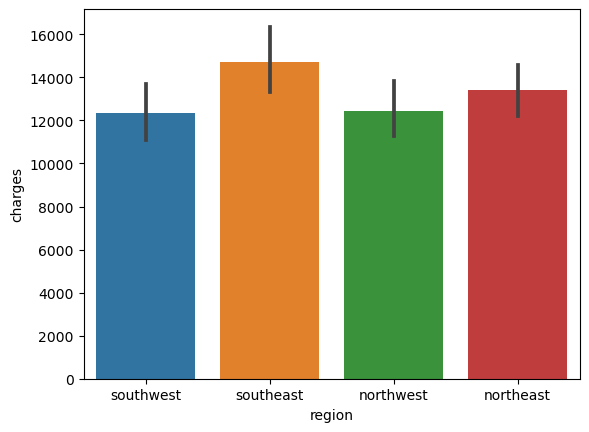

In [517]:
sns.barplot(data=df,x='region',y='charges')

In [518]:
# southeast has to pay more charges becoz also it has high smoker percentage followed by northeast 
# hence charges are high for southeast and northeast

In [519]:
df_region_bmi=df1.groupby(['region','BMI_category']).size()
df_region_bmi

region     BMI_category  
northeast  Healthy Weight     72
           Obesity           143
           Overweight         97
           Underweight        10
northwest  Healthy Weight     62
           Obesity           147
           Overweight        105
           Underweight         7
southeast  Healthy Weight     40
           Obesity           243
           Overweight         74
southwest  Healthy Weight     48
           Obesity           171
           Overweight        101
           Underweight         3
dtype: int64

In [520]:
labels=df_region_bmi['northeast'].index
labels =list(labels)
labels

['Healthy Weight', 'Obesity', 'Overweight', 'Underweight']

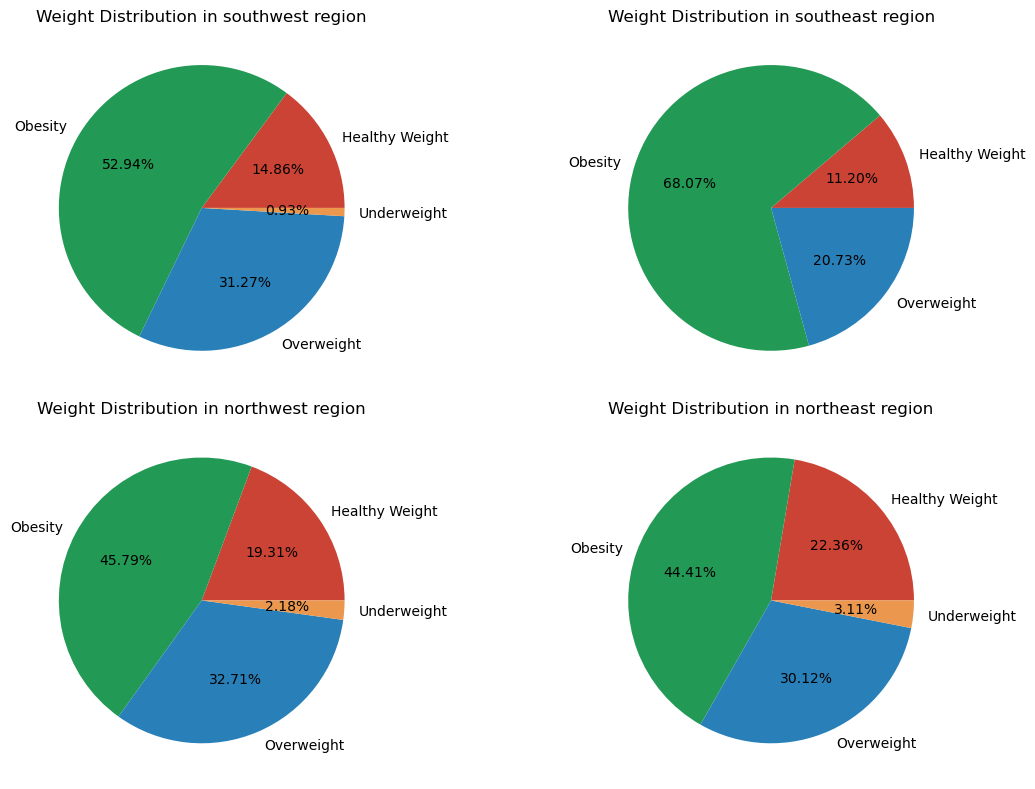

In [521]:
colors=['#cb4335','#229954','#2980b9','#eb984e']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
for i, j in enumerate(axes.flat):
    labels = df_region_bmi[regions[i]].index
    j.pie(df_region_bmi[regions[i]], autopct='%.2f%%', colors=colors, labels=labels)
    j.set_title(f'Weight Distribution in {regions[i]} region')
    
plt.tight_layout()
plt.show()

In [522]:
# so  prominent region:
# for obesity - southeast(68%)
# for healthy weight - northeast(22%)
# for underweight - northeast(3%)
# for overweight - northwest(68%)

<Axes: xlabel='BMI_category', ylabel='charges'>

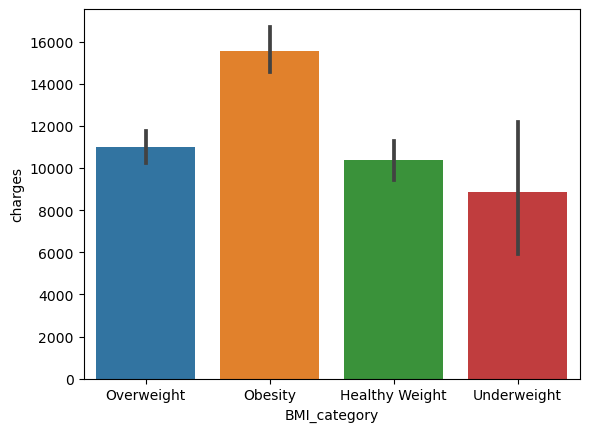

In [523]:
sns.barplot(data=df1,x='BMI_category',y='charges')

In [524]:
# people with obesity have high charges while underweight has least among all

<Axes: xlabel='BMI_category', ylabel='charges'>

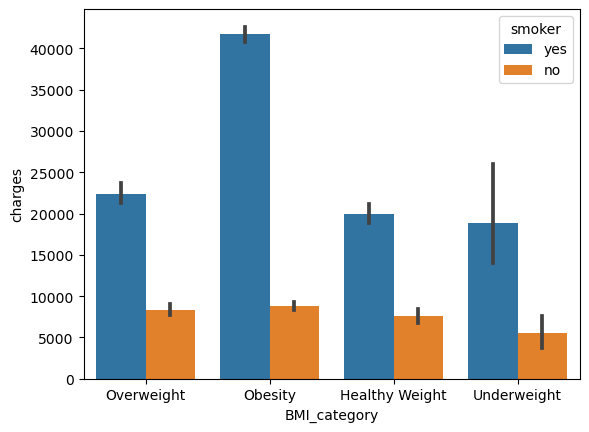

In [525]:
sns.barplot(data=df1,x='BMI_category',y='charges',hue='smoker')

In [526]:
# so any kind of weight smoker are being same in all range so no such relation between weight and smoking

In [527]:
df1.groupby(['region','children']).size()

region     children
northeast  0           147
           1            77
           2            51
           3            39
           4             7
           5             3
northwest  0           131
           1            74
           2            66
           3            46
           4             6
           5             1
southeast  0           157
           1            95
           2            66
           3            35
           4             5
           5             6
southwest  0           138
           1            78
           2            57
           3            37
           4             7
           5             8
dtype: int64

<Axes: xlabel='children', ylabel='charges'>

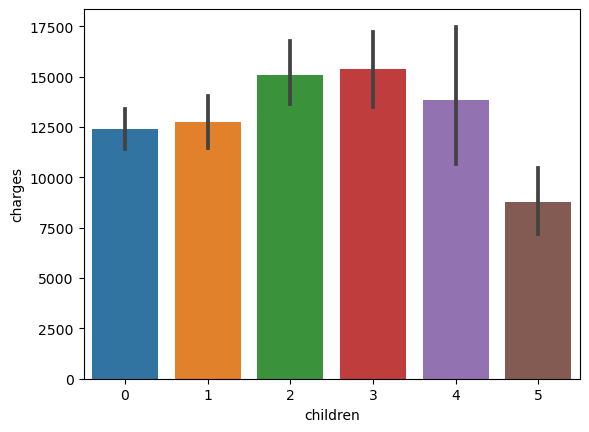

In [528]:
sns.barplot(data=df,x='children',y='charges')

In [529]:
# chareges are high for 2 and 3 children peole while somewhate less with 0,1 and very low for 5

In [530]:
df1

,age,sex,bmi,children,smoker,region,charges,BMI_category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obesity
2,28,male,33.000,3,no,southeast,4449.46200,Obesity
3,33,male,22.705,0,no,northwest,21984.47061,Healthy Weight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obesity
1334,18,female,31.920,0,no,northeast,2205.98080,Obesity
1335,18,female,36.850,0,no,southeast,1629.83350,Obesity
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight


In [531]:
df1.drop(['BMI_category'],axis=1,inplace=True)

In [532]:
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [533]:
df1[['sex', 'smoker', 'region']] = df1[['sex', 'smoker', 'region']].astype('category')
df1.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [534]:
# Modeling

In [535]:
from sklearn.preprocessing import LabelEncoder

In [536]:
le = LabelEncoder()

In [537]:
le.fit(df1.sex.drop_duplicates())

LabelEncoder()

In [538]:
df1.sex = le.transform(df1.sex)

In [539]:
#smoker

In [540]:
smoker_encoder=le.fit(df1.smoker.drop_duplicates())
smoker_encoder

LabelEncoder()

In [393]:
df1.smoker = le.transform(df1.smoker)

In [394]:
# region

In [395]:
le.fit(df1.region.drop_duplicates())

LabelEncoder()

In [396]:
df1.region = le.transform(df1.region)

In [397]:
df1.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

In [398]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [399]:
X = df1.drop('charges',axis=1)

In [400]:
y = df1['charges']

In [401]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [402]:
lr = LinearRegression()

In [403]:
lr.fit(X_train, y_train)

LinearRegression()

In [404]:
print(lr.coef_)
print(lr.intercept_)
print(lr.score(X_test,y_test))

[  248.76407134   -99.69539417   312.60904469   534.12087654
 23052.15275173  -237.62514748]
-11047.6865567202
0.8068466322629111


In [405]:
# using Ridge

In [406]:
from sklearn.linear_model import Ridge

In [407]:
ridge = Ridge(alpha=0.5)

In [408]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.5)

In [409]:
print("Accuracy",ridge.score(X_test,y_test))

Accuracy 0.8063759568087004


In [410]:
y_pred=ridge.predict(X_test)

In [411]:
print("slope: ",ridge.coef_)
print("Intercept: ",ridge.intercept_)
print("MAE: ",mean_absolute_error(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))

slope:  [  248.69649901   -94.97669301   312.51354186   534.39442373
 22984.38201707  -237.4991625 ]
Intercept:  -11031.4711128598
MAE:  4190.301452202512
MSE:  35579592.08055704


In [412]:
from sklearn.linear_model import Lasso

In [413]:
lasso  =Lasso()

In [414]:
lasso.fit(X_train,y_train)

Lasso()

In [415]:
print("slope: ",lasso.coef_)
print("Intercept: ",lasso.intercept_)
print("MAE: ",mean_absolute_error(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))
print("Accuracy: ",lasso.score(X_test,y_test) )

slope:  [  248.7637873    -95.16042711   312.53124535   533.47640185
 23045.45274434  -236.71687036]
Intercept:  -11046.980127934068
MAE:  4190.301452202512
MSE:  35579592.08055704
Accuracy:  0.8067959841661789


In [416]:
#Random Forest

In [417]:
from sklearn.ensemble import RandomForestRegressor

In [418]:
rfr = RandomForestRegressor()

In [419]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [420]:
print("MAE: ",mean_absolute_error(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))
print("Accuracy: ",rfr.score(X_test,y_test) )

MAE:  4190.301452202512
MSE:  35579592.08055704
Accuracy:  0.8827648202959822


In [421]:
# important Features

In [422]:
importances = rfr.feature_importances_

In [423]:
importances

array([0.13610254, 0.00751126, 0.21671366, 0.02358638, 0.60027452,
       0.01581165])

In [424]:
indices =np.argsort(importances)[::-1]

In [425]:
indices

array([4, 2, 0, 3, 5, 1], dtype=int64)

Feature importance ranking


1.smoker(0.600275)
2.bmi(0.216714)
3.age(0.136103)
4.children(0.023586)
5.region(0.015812)
6.sex(0.007511)


<BarContainer object of 6 artists>

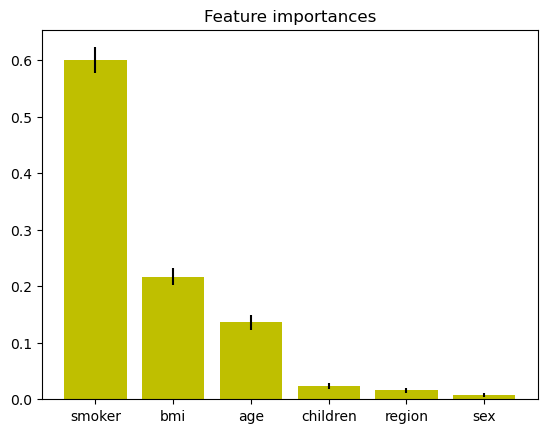

In [426]:
print('Feature importance ranking\n\n')
importances = rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
importance_list = []
for f in range(X.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="y", yerr=std[indices], align="center")

In [427]:
from sklearn.preprocessing import PolynomialFeatures
x = df1.drop(['charges', 'sex', 'region'], axis = 1)
y = df1.charges
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)
print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print(Pol_reg.score(x_test, y_test))

-4154.1724279903065
[ 0.00000000e+00  4.58324545e-01  4.03405523e+02  1.40260553e+03
 -1.12260916e+04  3.01311573e+00  3.24610178e-01 -5.35321284e-01
  2.51089226e+01 -6.58358646e+00 -8.22584809e+00  1.48200077e+03
 -1.41284021e+02 -3.75316527e+01 -1.12260916e+04]
0.8357482955959799


In [428]:
##Evaluating the performance of the algorithm
print('Mean Absolute Error:', mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 3175.8186596347655
Mean Squared Error: 27631993.106147557
Root Mean Squared Error: 5256.614224588633


In [429]:
# among all model polynomial regression best fit to model as MAE and MSE is less than other accuracy also good about 83%

In [430]:
import pickle 

In [431]:
pickle.dump(Pol_reg,open('insuarance_model.pkl','wb'))

In [546]:
model = pickle.load(open('insuarance_model.pkl','rb'))

In [556]:
model.predict(x_test)

array([ 2687.45443213, 10135.03732079, 10754.90295371, 26162.8737612 ,
        9141.6568123 ,  3116.33228919,  3040.70450515,  2470.78898887,
        4162.47216184, 12650.21474788,  9473.10369023, 22521.9469416 ,
       14652.1377117 , 10002.80529955,  7130.85967181,  2274.51409885,
        6168.4224169 ,  5305.97772133,  7266.14730214, 15045.66939277,
        3189.77068003, 14427.54699032,  3309.00599594,  4706.07271782,
        3670.42219996,  6155.09132205,  3384.85083962, 11817.03794107,
        5036.37805474, 36066.03111229,  9376.3399241 , 53416.96530582,
       11422.13484293, 11538.99630294, 11819.06066199, 16000.02600353,
       10181.52438187, 37617.83300304,  9270.32812739,  3409.36146389,
       26964.23851039,  4787.88363904,  6040.44838106, 47887.54386514,
       35582.63990277,  9614.40206105, 12150.14375635,  9314.15066331,
       10931.81986582,  8569.04170492, 27348.77378973,  4974.73221176,
       30596.98200857, 42650.36343368, 12140.58519698,  4322.76798305,
      

In [559]:
x_test

array([[ 1.   , 18.   , 39.82 , ...,  0.   ,  0.   ,  0.   ],
       [ 1.   , 47.   , 29.37 , ...,  1.   ,  0.   ,  0.   ],
       [ 1.   , 49.   , 31.35 , ...,  1.   ,  0.   ,  0.   ],
       ...,
       [ 1.   , 18.   , 26.18 , ...,  4.   ,  0.   ,  0.   ],
       [ 1.   , 54.   , 25.1  , ...,  9.   ,  3.   ,  1.   ],
       [ 1.   , 62.   , 30.495, ...,  4.   ,  0.   ,  0.   ]])

In [434]:
x

,age,bmi,children,smoker
0,19,27.900,0,1
1,18,33.770,1,0
2,28,33.000,3,0
3,33,22.705,0,0
4,32,28.880,0,0
...,...,...,...,...
1333,50,30.970,3,0
1334,18,31.920,0,0
1335,18,36.850,0,0
1336,21,25.800,0,0


In [544]:
pickle.dump(smoker_encoder,open('smoker_encoder.pkl','wb'))

In [545]:
smoker_encoder = pickle.load(open('smoker_encoder.pkl','rb'))

In [600]:
smoker_encoder.transform([['yes']])

array([1])

In [602]:
smoker_encoder.transform([['no']])

array([0])

In [587]:
pickle.dump(pol,open('poly_features.pkl','wb'))

In [588]:
poly_features = pickle.load(open('poly_features.pkl','rb'))

In [562]:
# age,bmi,children, smoker(yes,no)

In [589]:
a = [[28, 33.00,3,0]]

In [590]:
a_pol =poly_features.transform(a)

In [591]:
a_pol

array([[1.000e+00, 2.800e+01, 3.300e+01, 3.000e+00, 0.000e+00, 7.840e+02,
        9.240e+02, 8.400e+01, 0.000e+00, 1.089e+03, 9.900e+01, 0.000e+00,
        9.000e+00, 0.000e+00, 0.000e+00]])

In [592]:
model.predict(a_pol)

array([6740.6742653])